# Data Preprocessing & Visualization

In [4]:
# Import labraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Current working directory

os.getcwd()

'c:\\Users\\Admin\\Documents\\Apziva_Projects'

In [6]:
# Loading the dataset

df = pd.read_csv("potential_talents.csv")

In [7]:
df.head(5)

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [8]:
df.tail(5)

,id,job_title,location,connection,fit
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN
103,104,Director Of Administration at Excellence Logging,"Katy, Texas",500+,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


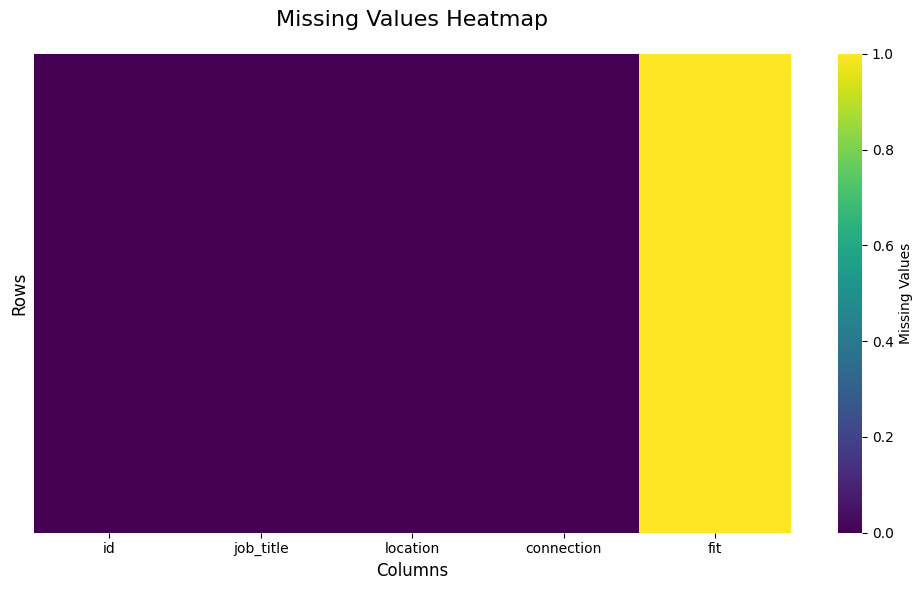

Missing Values Summary:
id              0
job_title       0
location        0
connection      0
fit           104
dtype: int64

Total missing values: 104
Percentage of missing data: 20.00%


In [10]:
# Checking  NaN values


# Create heatmap of NaN values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), 
            cbar=True,
            yticklabels=False,  # Hide row labels for cleaner look
            cmap='viridis',     # Color scheme
            cbar_kws={'label': 'Missing Values'})

plt.title('Missing Values Heatmap', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Missing Values Summary:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")




The dataset doesn't contain any missing or empty value. So, fit is the variable we want to predict.

# Data preprocessing

In [11]:
# Separating numerical and text columns

df1 = df[["job_title"]] # I retired location column because it is not so significant for the analysis

In [12]:
df2 = df[["job_title", "connection"]]

In [13]:
## Cleaning text column



import pandas as pd
import re
import string
from typing import List, Set

def clean_dataframe_text(df: pd.DataFrame, 
                        custom_stopwords: Set[str] = None,
                        keep_numbers: bool = False) -> pd.DataFrame:
    """
    Clean text data in all object-type columns of a pandas DataFrame.
    
    This function performs comprehensive text cleaning including:
    - Removal of unwanted special characters
    - Text normalization (lowercasing)
    - Tokenization and stop words removal
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe containing text columns to be cleaned
    custom_stopwords : Set[str], optional
        Additional custom stop words to remove beyond the default English stop words
    keep_numbers : bool, default False
        Whether to keep numbers in the cleaned text
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with cleaned text in object-type columns
    """
    
    # Default English stop words (common words that don't add much meaning)
    default_stopwords = {
        'a', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'by', 'for', 'from',
        'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to',
        'was', 'will', 'with', 'the', 'this', 'but', 'they', 'have', 'had', 
        'what', 'said', 'each', 'which', 'she', 'do', 'how', 'their', 'if',
        'up', 'out', 'many', 'then', 'them', 'these', 'so', 'some', 'her',
        'would', 'make', 'like', 'into', 'him', 'time', 'two', 'more', 'go',
        'no', 'way', 'could', 'my', 'than', 'first', 'been', 'call', 'who',
        'oil', 'sit', 'now', 'find', 'down', 'day', 'did', 'get', 'come',
        'made', 'may', 'part'
    }
    
    # Combine default stopwords with custom ones if provided
    if custom_stopwords:
        stopwords = default_stopwords.union(custom_stopwords)
    else:
        stopwords = default_stopwords
    
    def clean_text(text: str) -> str:
        """
        Clean individual text string.
        
        Parameters:
        -----------
        text : str
            Input text string to be cleaned
            
        Returns:
        --------
        str
            Cleaned text string
        """
        # Handle NaN or None values
        if pd.isna(text) or text is None:
            return ""
        
        # Convert to string if not already
        text = str(text)
        
        # Step 1: Remove unwanted special characters
        # Keep only alphanumeric characters, spaces, and basic punctuation
        if keep_numbers:
            # Keep letters, numbers, and spaces
            text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
        else:
            # Keep only letters and spaces
            text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        
        # Step 2: Text normalization (lowercasing)
        text = text.lower()
        
        # Step 3: Remove extra whitespaces and normalize spacing
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Step 4: Tokenization and stop words removal
        # Split text into tokens (words)
        tokens = text.split()
        
        # Remove stop words and empty tokens
        cleaned_tokens = [token for token in tokens 
                         if token and token not in stopwords and len(token) > 1]
        
        # Join tokens back into cleaned text
        cleaned_text = ' '.join(cleaned_tokens)
        
        return cleaned_text
    
    # Create a copy of the dataframe to avoid modifying the original
    df_cleaned = df.copy()
    
    # Get all object-type columns (typically text columns)
    text_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
    
    # Apply text cleaning to each object-type column
    for column in text_columns:
        print(f"Cleaning column: {column}")
        df_cleaned[column] = df_cleaned[column].apply(clean_text)
    
    print(f"Text cleaning completed for {len(text_columns)} columns: {text_columns}")
    
    return df_cleaned




In [14]:
df_text = clean_dataframe_text(df1, keep_numbers=True)

Cleaning column: job_title
Text cleaning completed for 1 columns: ['job_title']


In [15]:
df_text

,job_title
0,2019 bauer college business graduate magna cum...
1,native english teacher epik english program korea
2,aspiring human resources professional
3,people development coordinator ryan
4,advisory board member celal bayar university
...,...
99,aspiring human resources manager graduating 20...
100,human resources generalist loparex
101,business intelligence analytics travelers
102,always set success


In [16]:
# Add the keywords to the dataframe for embedding

df_text.loc[len(df_text)] = "Aspiring human resources"
df_text

,job_title
0,2019 bauer college business graduate magna cum...
1,native english teacher epik english program korea
2,aspiring human resources professional
3,people development coordinator ryan
4,advisory board member celal bayar university
...,...
100,human resources generalist loparex
101,business intelligence analytics travelers
102,always set success
103,director administration excellence logging


In [17]:
# Cleaning numerical column(connection)

import pandas as pd
import re

def preprocess_connections(df: pd.DataFrame, column_name: str = 'connection') -> pd.DataFrame:
    """
    Preprocess the connection column by removing special characters and converting to integer.
    
    This function handles common patterns in connection data:
    - "500+" becomes 500
    - "200-300" becomes the average (250)
    - "1000+" becomes 1000
    - Removes any special characters and symbols
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe containing the connection column
    column_name : str, default 'connection'
        Name of the column to preprocess
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with the connection column converted to integer
    """
    
    def clean_connection_value(value):
        """
        Clean individual connection value and convert to integer.
        
        Parameters:
        -----------
        value : str or numeric
            Connection value to be cleaned
            
        Returns:
        --------
        int
            Cleaned integer value
        """
        # Handle NaN or None values
        if pd.isna(value) or value is None:
            return 0
        
        # Convert to string for processing
        value_str = str(value).strip()
        
        # Remove any non-numeric characters except hyphens (for ranges)
        # Keep hyphens temporarily for range processing
        cleaned_value = re.sub(r'[^\d\-]', '', value_str)
        
        # Handle empty string after cleaning
        if not cleaned_value:
            return 0
        
        # Handle range values (e.g., "200-300")
        if '-' in cleaned_value:
            # Split by hyphen and calculate average
            parts = cleaned_value.split('-')
            if len(parts) == 2:
                try:
                    start = int(parts[0]) if parts[0] else 0
                    end = int(parts[1]) if parts[1] else 0
                    # Return average of the range
                    return int((start + end) / 2)
                except ValueError:
                    return 0
        
        # Handle single numeric values (including those with + removed)
        try:
            return int(cleaned_value)
        except ValueError:
            return 0
    
    # Create a copy of the dataframe to avoid modifying the original
    df_processed = df.copy()
    
    # Check if the column exists
    if column_name not in df_processed.columns:
        raise ValueError(f"Column '{column_name}' not found in the dataframe")
    
    # Apply the cleaning function to the specified column
    df_processed[column_name] = df_processed[column_name].apply(clean_connection_value)
    
    # Ensure the column is of integer type
    df_processed[column_name] = df_processed[column_name].astype(int)
    
    print(f"Successfully preprocessed '{column_name}' column and converted to integer type")
    
    return df_processed




In [18]:
df_numeric = preprocess_connections(df2)
df_numeric

Successfully preprocessed 'connection' column and converted to integer type


,job_title,connection
0,2019 C.T. Bauer College of Business Graduate (...,85
1,Native English Teacher at EPIK (English Progra...,500
2,Aspiring Human Resources Professional,44
3,People Development Coordinator at Ryan,500
4,Advisory Board Member at Celal Bayar University,500
...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103
100,Human Resources Generalist at Loparex,500
101,Business Intelligence and Analytics at Travelers,49
102,Always set them up for Success,500


# Embedding of cleaned text data using Word2Vec(Skip-gram)

In [19]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec


# Convert job_title to list of tokens for each row
sentences = [row.split() for row in df_text['job_title'] if row and len(row.strip()) > 0]

# Train Word2Vec model with skip-gram
model = Word2Vec(
    sentences=sentences,        # List of tokenized sentences
    vector_size=50,           # Dimension of word vectors
    window=2,                  # Context window size
    min_count=1,               # Ignore words with frequency less than this
    workers=4,                 # Number of CPU cores to use
    sg=1,                      # Use skip-gram (1) instead of CBOW (0)
    epochs=50,             # Number of training epochs
    alpha=0.03,
    min_alpha=0.0001,
    seed=42                   
                                                            
)

# Get vocabulary
vocab = list(model.wv.key_to_index.keys())
print(f"Vocabulary size: {len(vocab)}")
print(f"Sample words: {vocab[:10]}")

# Vectorize job_title column
def vectorize_job_title(job_title):
    """Convert job_title to average word vector"""
    if not job_title or len(job_title.strip()) == 0:
        return np.zeros(model.vector_size)
    
    tokens = job_title.split()
    vectors = []
    
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
    
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    
    # Return average of word vectors
    return np.mean(vectors, axis=0)

# Apply vectorization to dataframe
job_title_vectors = np.array([vectorize_job_title(title) for title in df_text['job_title']])

# Add vectors as new columns to dataframe
vector_columns = [f'job_title_vec_{i}' for i in range(model.vector_size)]
job_title_df = pd.DataFrame(job_title_vectors, columns=vector_columns, index=df_text.index)

# Combine with original dataframe
df_with_vectors = pd.concat([df_text, job_title_df], axis=1)

print(f"Job title vectors shape: {job_title_vectors.shape}")
print(f"Added {model.vector_size} vector columns to dataframe")
print(f"New dataframe shape: {df_with_vectors.shape}")


# Save model for later use
#model.save("job_title_word2vec.model")

Vocabulary size: 187
Sample words: ['human', 'resources', 'aspiring', 'professional', 'student', 'seeking', 'college', 'generalist', 'specialist', 'university']
Job title vectors shape: (105, 50)
Added 50 vector columns to dataframe
New dataframe shape: (105, 51)


In [20]:
job_title_df

,job_title_vec_0,job_title_vec_1,job_title_vec_2,job_title_vec_3,job_title_vec_4,job_title_vec_5,job_title_vec_6,job_title_vec_7,job_title_vec_8,job_title_vec_9,...,job_title_vec_40,job_title_vec_41,job_title_vec_42,job_title_vec_43,job_title_vec_44,job_title_vec_45,job_title_vec_46,job_title_vec_47,job_title_vec_48,job_title_vec_49
0,0.054736,-0.033760,-0.069943,0.112291,0.082253,-0.028124,-0.013890,0.067906,-0.157732,-0.018261,...,-0.068226,0.051849,0.280218,-0.110637,0.010623,-0.080981,0.053303,0.203093,0.024418,-0.135340
1,0.069168,-0.042385,-0.112631,0.072091,0.122680,-0.117922,0.011738,0.101957,-0.152545,0.006212,...,-0.071768,0.061470,0.312322,-0.132673,-0.012430,-0.074879,0.081828,0.295914,0.052702,-0.132874
2,0.066759,-0.038601,-0.067460,0.073091,0.085359,-0.043068,-0.014835,0.075663,-0.159432,-0.014495,...,-0.059735,0.054351,0.275686,-0.107025,0.018552,-0.054172,0.041396,0.201093,0.020879,-0.129664
3,0.072801,-0.036974,-0.055785,0.073931,0.102930,-0.067381,-0.014314,0.102489,-0.139138,-0.010277,...,-0.053342,0.050279,0.263627,-0.076273,-0.004435,-0.026859,0.058830,0.236268,0.033087,-0.086327
4,0.119885,-0.054643,-0.112741,0.101291,0.177330,-0.088115,-0.002141,0.116403,-0.226917,-0.017215,...,-0.094010,0.060451,0.383243,-0.149758,-0.012419,-0.073887,0.067749,0.319426,0.054933,-0.181850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.053457,-0.030626,-0.061702,0.060363,0.075889,-0.043805,-0.018176,0.069392,-0.139642,-0.014859,...,-0.049618,0.044985,0.228749,-0.088391,0.006207,-0.032270,0.034777,0.177160,0.013062,-0.109002
101,0.073733,-0.053093,-0.108353,0.127428,0.126837,-0.072778,-0.000146,0.081722,-0.203647,-0.019259,...,-0.081912,0.058921,0.336593,-0.129542,-0.008071,-0.075550,0.066253,0.279419,0.028803,-0.147972
102,0.084480,-0.035004,-0.108018,0.085532,0.103721,-0.078634,-0.008720,0.101062,-0.180070,-0.011291,...,-0.076856,0.047024,0.318776,-0.131251,-0.011654,-0.058228,0.065397,0.268281,0.014537,-0.156742
103,0.084616,-0.046928,-0.122432,0.095687,0.152022,-0.096718,-0.025610,0.114323,-0.209475,-0.021752,...,-0.113967,0.071955,0.375926,-0.137611,-0.024937,-0.059834,0.084401,0.320243,0.033358,-0.164654


In [21]:
df_with_vectors

,job_title,job_title_vec_0,job_title_vec_1,job_title_vec_2,job_title_vec_3,job_title_vec_4,job_title_vec_5,job_title_vec_6,job_title_vec_7,job_title_vec_8,...,job_title_vec_40,job_title_vec_41,job_title_vec_42,job_title_vec_43,job_title_vec_44,job_title_vec_45,job_title_vec_46,job_title_vec_47,job_title_vec_48,job_title_vec_49
0,2019 bauer college business graduate magna cum...,0.054736,-0.033760,-0.069943,0.112291,0.082253,-0.028124,-0.013890,0.067906,-0.157732,...,-0.068226,0.051849,0.280218,-0.110637,0.010623,-0.080981,0.053303,0.203093,0.024418,-0.135340
1,native english teacher epik english program korea,0.069168,-0.042385,-0.112631,0.072091,0.122680,-0.117922,0.011738,0.101957,-0.152545,...,-0.071768,0.061470,0.312322,-0.132673,-0.012430,-0.074879,0.081828,0.295914,0.052702,-0.132874
2,aspiring human resources professional,0.066759,-0.038601,-0.067460,0.073091,0.085359,-0.043068,-0.014835,0.075663,-0.159432,...,-0.059735,0.054351,0.275686,-0.107025,0.018552,-0.054172,0.041396,0.201093,0.020879,-0.129664
3,people development coordinator ryan,0.072801,-0.036974,-0.055785,0.073931,0.102930,-0.067381,-0.014314,0.102489,-0.139138,...,-0.053342,0.050279,0.263627,-0.076273,-0.004435,-0.026859,0.058830,0.236268,0.033087,-0.086327
4,advisory board member celal bayar university,0.119885,-0.054643,-0.112741,0.101291,0.177330,-0.088115,-0.002141,0.116403,-0.226917,...,-0.094010,0.060451,0.383243,-0.149758,-0.012419,-0.073887,0.067749,0.319426,0.054933,-0.181850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,human resources generalist loparex,0.053457,-0.030626,-0.061702,0.060363,0.075889,-0.043805,-0.018176,0.069392,-0.139642,...,-0.049618,0.044985,0.228749,-0.088391,0.006207,-0.032270,0.034777,0.177160,0.013062,-0.109002
101,business intelligence analytics travelers,0.073733,-0.053093,-0.108353,0.127428,0.126837,-0.072778,-0.000146,0.081722,-0.203647,...,-0.081912,0.058921,0.336593,-0.129542,-0.008071,-0.075550,0.066253,0.279419,0.028803,-0.147972
102,always set success,0.084480,-0.035004,-0.108018,0.085532,0.103721,-0.078634,-0.008720,0.101062,-0.180070,...,-0.076856,0.047024,0.318776,-0.131251,-0.011654,-0.058228,0.065397,0.268281,0.014537,-0.156742
103,director administration excellence logging,0.084616,-0.046928,-0.122432,0.095687,0.152022,-0.096718,-0.025610,0.114323,-0.209475,...,-0.113967,0.071955,0.375926,-0.137611,-0.024937,-0.059834,0.084401,0.320243,0.033358,-0.164654


In [22]:
df_with_vectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         105 non-null    object 
 1   job_title_vec_0   105 non-null    float32
 2   job_title_vec_1   105 non-null    float32
 3   job_title_vec_2   105 non-null    float32
 4   job_title_vec_3   105 non-null    float32
 5   job_title_vec_4   105 non-null    float32
 6   job_title_vec_5   105 non-null    float32
 7   job_title_vec_6   105 non-null    float32
 8   job_title_vec_7   105 non-null    float32
 9   job_title_vec_8   105 non-null    float32
 10  job_title_vec_9   105 non-null    float32
 11  job_title_vec_10  105 non-null    float32
 12  job_title_vec_11  105 non-null    float32
 13  job_title_vec_12  105 non-null    float32
 14  job_title_vec_13  105 non-null    float32
 15  job_title_vec_14  105 non-null    float32
 16  job_title_vec_15  105 non-null    float32
 1

# Numerical data embedding using MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler



# Initialise MinMaxScaler
scaler = MinMaxScaler()

# Apply to conncetion variable
df_numeric['connection_normalise'] = scaler.fit_transform(df_numeric[['connection']])

df_numeric

,job_title,connection,connection_normalise
0,2019 C.T. Bauer College of Business Graduate (...,85,0.168337
1,Native English Teacher at EPIK (English Progra...,500,1.000000
2,Aspiring Human Resources Professional,44,0.086172
3,People Development Coordinator at Ryan,500,1.000000
4,Advisory Board Member at Celal Bayar University,500,1.000000
...,...,...,...
99,Aspiring Human Resources Manager | Graduating ...,103,0.204409
100,Human Resources Generalist at Loparex,500,1.000000
101,Business Intelligence and Analytics at Travelers,49,0.096192
102,Always set them up for Success,500,1.000000


# Cosine similarity between the embeded vector and Keywords(“Aspiring human resources” or “seeking human resources”)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Extract the vector columns (columns 1-50)
vector_columns = [col for col in df_with_vectors.columns if col.startswith('job_title_vec_')]

# Get all vectors and the last vector
all_vectors = df_with_vectors[vector_columns].values
last_vector = df_with_vectors.iloc[-1][vector_columns].values.reshape(1, -1)

# Compute cosine similarity between each observation and the last observation
cosine_similarity_scores = cosine_similarity(all_vectors, last_vector)

# Create the cosine_similarity variable (flatten to get 1D array)
cosine_similarity = cosine_similarity_scores.flatten()

# Add cosine similarity as a new column to df_with_vectors
df_with_vectors['cosine_similarity'] = cosine_similarity



In [25]:
df_cosine = df_with_vectors[['job_title', 'cosine_similarity']]
df_cosine

,job_title,cosine_similarity
0,2019 bauer college business graduate magna cum...,0.991909
1,native english teacher epik english program korea,0.972938
2,aspiring human resources professional,0.997649
3,people development coordinator ryan,0.978278
4,advisory board member celal bayar university,0.983525
...,...,...
100,human resources generalist loparex,0.996843
101,business intelligence analytics travelers,0.992066
102,always set success,0.988476
103,director administration excellence logging,0.988301


In [26]:
# Add the connection_normalise column to df_cosine
df_cosine['connection_normalise'] = df_numeric['connection_normalise']
df_cosine

C:\Users\Admin\AppData\Local\Temp\ipykernel_11312\4151605537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cosine['connection_normalise'] = df_numeric['connection_normalise']


,job_title,cosine_similarity,connection_normalise
0,2019 bauer college business graduate magna cum...,0.991909,0.168337
1,native english teacher epik english program korea,0.972938,1.000000
2,aspiring human resources professional,0.997649,0.086172
3,people development coordinator ryan,0.978278,1.000000
4,advisory board member celal bayar university,0.983525,1.000000
...,...,...,...
100,human resources generalist loparex,0.996843,1.000000
101,business intelligence analytics travelers,0.992066,0.096192
102,always set success,0.988476,1.000000
103,director administration excellence logging,0.988301,1.000000


# Ranking potential talents based on cosine similarity and connection_normalise

In [27]:
# Create the ranking variable
df_cosine['ranking'] = 0.8 * df_cosine['cosine_similarity'] + 0.2 * df_cosine['connection_normalise']

# Sort the dataframe by ranking in descending order
df_cosine = df_cosine.sort_values('ranking', ascending=False).reset_index(drop=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_11312\51158647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cosine['ranking'] = 0.8 * df_cosine['cosine_similarity'] + 0.2 * df_cosine['connection_normalise']


In [28]:
# Top 10 potential talents

df_cosine.head(10)

,job_title,cosine_similarity,connection_normalise,ranking
0,human resources generalist loparex,0.996843,1.0,0.997474
1,human resources staffing recruiting professional,0.996562,1.0,0.997249
2,human resources generalist schwan,0.996329,1.0,0.997063
3,aspiring human resources management student se...,0.996289,1.0,0.997031
4,aspiring human resources management student se...,0.996289,1.0,0.997031
5,human resources specialist luxottica,0.995634,1.0,0.996507
6,human resources generalist scottmadden inc,0.995328,1.0,0.996262
7,seeking human resources hris generalist positions,0.995295,1.0,0.996236
8,seeking human resources hris generalist positions,0.995295,1.0,0.996236
9,seeking human resources hris generalist positions,0.995295,1.0,0.996236


In [29]:
# Bottom 10 potential talents

df_cosine.tail(10)

,job_title,cosine_similarity,connection_normalise,ranking
95,aspiring human resources specialist,0.996480,0.000000,0.797184
96,aspiring human resources specialist,0.996480,0.000000,0.797184
97,admissions representative community medical ce...,0.990716,0.016032,0.795780
98,information systems specialist programmer love...,0.990290,0.006012,0.793434
99,student chapman university,0.988195,0.002004,0.790957
100,student chapman university,0.988195,0.002004,0.790957
101,student chapman university,0.988195,0.002004,0.790957
102,student chapman university,0.988195,0.002004,0.790957
103,student,0.986635,0.006012,0.790511
104,Aspiring human resources,1.000000,NaN,NaN


### Embedding using sentence Bert model

In [30]:
import pandas as pd
import numpy as np
from langchain_huggingface import HuggingFaceEmbeddings

# Initialize SentenceBERT model
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

print(f"SentenceBERT model initialised: {embeddings.model_name}")



SentenceBERT model initialised: sentence-transformers/all-MiniLM-L6-v2


In [37]:
# Function to vectorize job titles using SentenceBERT
def vectorize_job_title_bert(job_title):
    """Convert job_title to SentenceBERT embedding"""
    if not job_title or len(job_title.strip()) == 0:
        # Return zero vector with same dimension as model output (384 for all-MiniLM-L6-v2)
        return np.zeros(384)
    
    # Get embedding for the entire job title (sentence-level embedding)
    embedding = embeddings.embed_query(job_title)
    return np.array(embedding)

# Test with a sample to get vector dimension
sample_title = df_text['job_title'].dropna().iloc[0] if not df_text['job_title'].dropna().empty else "Data Scientist"
sample_vector = vectorize_job_title_bert(sample_title)
vector_size = len(sample_vector)

print(f"Dimension of vecteurs: {vector_size}")
print(f"Example of title: '{sample_title}'")
print(f"Shape of vector: {sample_vector.shape}")

# Apply vectorization to all job titles
print("Generation of embeddings for all the position title...")
job_title_vectors = np.array([vectorize_job_title_bert(title) for title in df_text['job_title']])

# Create column names for vector features
vector_columns = [f'job_title_bert_{i}' for i in range(vector_size)]

# Create DataFrame with vectors
job_title_df = pd.DataFrame(job_title_vectors, columns=vector_columns, index=df_text.index)

# Combine with original dataframe
df_with_vectors_2 = pd.concat([df_text, job_title_df], axis=1)

print(f"Job title vectors shape: {job_title_vectors.shape}")
print(f"Ajout de {vector_size} colonnes de vecteurs au dataframe")
print(f"Nouvelle forme du dataframe: {df_with_vectors.shape}")

# Optionnel: Sauvegarder les vecteurs pour réutilisation
# np.save('job_title_bert_vectors.npy', job_title_vectors)
# df_with_vectors.to_csv('df_with_bert_vectors.csv', index=False)

print("Embedding completed with SentenceBERT!")


Dimension of vecteurs: 384
Example of title: '2019 bauer college business graduate magna cum laude aspiring human resources professional'
Shape of vector: (384,)
Generation of embeddings for all the position title...
Job title vectors shape: (105, 384)
Ajout de 384 colonnes de vecteurs au dataframe
Nouvelle forme du dataframe: (105, 386)
Embedding completed with SentenceBERT!


In [50]:
df_with_vectors_2.head(2)

,job_title,job_title_bert_0,job_title_bert_1,job_title_bert_2,job_title_bert_3,job_title_bert_4,job_title_bert_5,job_title_bert_6,job_title_bert_7,job_title_bert_8,...,job_title_bert_375,job_title_bert_376,job_title_bert_377,job_title_bert_378,job_title_bert_379,job_title_bert_380,job_title_bert_381,job_title_bert_382,job_title_bert_383,cosine_similarity
0,2019 bauer college business graduate magna cum...,-0.059216,0.003777,-0.015603,0.004344,0.004493,0.031960,-0.049156,0.014326,-0.01568,...,-0.000932,-0.002026,-0.046002,-0.089525,0.015831,0.057588,-0.128677,-0.024057,-0.032706,0.548692
1,native english teacher epik english program korea,-0.020414,0.017401,0.051365,-0.011567,0.010640,-0.016599,0.043034,0.025093,-0.06136,...,0.052948,0.016263,-0.103442,-0.058693,-0.062418,0.034240,0.017132,-0.070108,0.047913,0.141922


# Cosine similarity with SentenceBERT embeddings

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Extract the vector columns (columns 1-50)
vector_columns = [col for col in df_with_vectors.columns if col.startswith('job_title_bert_')]

# Get all vectors and the last vector
all_vectors = df_with_vectors[vector_columns].values
last_vector = df_with_vectors.iloc[-1][vector_columns].values.reshape(1, -1)

# Compute cosine similarity between each observation and the last observation
cosine_similarity_scores = cosine_similarity(all_vectors, last_vector)

# Create the cosine_similarity variable (flatten to get 1D array)
cosine_similarity = cosine_similarity_scores.flatten()

# Add cosine similarity as a new column to df_with_vectors
df_with_vectors_2['cosine_similarity'] = cosine_similarity



In [41]:
df_cosine_2 = df_with_vectors_2[['job_title', 'cosine_similarity']]
df_cosine_2

,job_title,cosine_similarity
0,2019 bauer college business graduate magna cum...,0.548692
1,native english teacher epik english program korea,0.141922
2,aspiring human resources professional,0.949807
3,people development coordinator ryan,0.378423
4,advisory board member celal bayar university,0.201885
...,...,...
100,human resources generalist loparex,0.553511
101,business intelligence analytics travelers,0.067039
102,always set success,0.029454
103,director administration excellence logging,0.279863


# Ranking potential talents

In [44]:
# Add the connection_normalise column to df_cosine_2
df_cosine_2['connection_normalise'] = df_numeric['connection_normalise']
df_cosine_2.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11312\2392094241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cosine_2['connection_normalise'] = df_numeric['connection_normalise']


,job_title,cosine_similarity,connection_normalise
0,2019 bauer college business graduate magna cum...,0.548692,0.168337
1,native english teacher epik english program korea,0.141922,1.000000
2,aspiring human resources professional,0.949807,0.086172
3,people development coordinator ryan,0.378423,1.000000
4,advisory board member celal bayar university,0.201885,1.000000


In [45]:
# Create the ranking variable
df_cosine_2['ranking'] = 0.8 * df_cosine_2['cosine_similarity'] + 0.2 * df_cosine_2['connection_normalise']

# Sort the dataframe by ranking in descending order
df_cosine_2 = df_cosine_2.sort_values('ranking', ascending=False).reset_index(drop=True)



C:\Users\Admin\AppData\Local\Temp\ipykernel_11312\1776017634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cosine_2['ranking'] = 0.8 * df_cosine_2['cosine_similarity'] + 0.2 * df_cosine_2['connection_normalise']


In [46]:
# Top 10 potential talents

df_cosine_2.head(10)

,job_title,cosine_similarity,connection_normalise,ranking
0,seeking human resources opportunities,0.799642,0.779559,0.795625
1,seeking human resources opportunities,0.799642,0.779559,0.795625
2,aspiring human resources professional,0.949807,0.140281,0.787902
3,seeking human resources hris generalist positions,0.733465,1.000000,0.786772
4,seeking human resources hris generalist positions,0.733465,1.000000,0.786772
5,seeking human resources hris generalist positions,0.733465,1.000000,0.786772
6,seeking human resources hris generalist positions,0.733465,1.000000,0.786772
7,aspiring human resources management student se...,0.724980,1.000000,0.779984
8,aspiring human resources management student se...,0.724980,1.000000,0.779984
9,aspiring human resources professional,0.949807,0.086172,0.777080


In [48]:
# Bottom 10 potential talents

df_cosine_2.tail(10)

,job_title,cosine_similarity,connection_normalise,ranking
95,student chapman university,0.277435,0.002004,0.222349
96,student chapman university,0.277435,0.002004,0.222349
97,student westfield state university,0.235065,0.112224,0.210497
98,lead official western illinois university,0.229515,0.076152,0.198842
99,student,0.238388,0.006012,0.191913
100,student indiana university kokomo business man...,0.211104,0.036072,0.176098
101,bachelor science biology victoria university w...,0.187515,0.078156,0.165644
102,admissions representative community medical ce...,0.128007,0.016032,0.105612
103,business intelligence analytics travelers,0.067039,0.096192,0.072870
104,Aspiring human resources,1.000000,NaN,NaN
